# Jupyter Notebook and processed mp4 file for Part 3
Student Name: Lim Zhao Hong  
Student ID: 20065320







#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
from time import sleep
from tqdm import tqdm

from google.colab.patches import cv2_imshow

In [3]:
DataFolder = "/content/drive/MyDrive/SDAAI/TA1-1-C3849C-A-Computer-Vision/CWF"


In [4]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

In [5]:
show_local_mp4_video(DataFolder + "/toycars.mp4", width = 500)

# Using available trackers in OpenCV

In [7]:
!pip install opencv-python
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Setting up the trackers

In [6]:
import cv2
import sys

(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
 
if __name__ == '__main__' :
 
    # Set up tracker.
    # Instead of CSRT, you can also use
 
    tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'GOTURN', 'MOSSE', 'CSRT']
    tracker_type = tracker_types[7]
 
    if int(minor_ver) < 3:
        tracker = cv2.Tracker_create(tracker_type)
    else:
        if tracker_type == 'BOOSTING':
            tracker = cv2.TrackerBoosting_create()
        elif tracker_type == 'MIL':
            tracker = cv2.TrackerMIL_create()
        elif tracker_type == 'KCF':
            tracker = cv2.TrackerKCF_create()
        elif tracker_type == 'TLD':
            tracker = cv2.TrackerTLD_create()
        elif tracker_type == 'MEDIANFLOW':
            tracker = cv2.TrackerMedianFlow_create()
        elif tracker_type == 'GOTURN':
             tracker = cv2.TrackerGOTURN_create()
        elif tracker_type == 'MOSSE':
            tracker = cv2.TrackerMOSSE_create()
        elif tracker_type == "CSRT":
            tracker = cv2.TrackerCSRT_create()

Capturing the video input

In [7]:
# Read video
#video = cv2.VideoCapture("/content/drive/MyDrive/SDAAI/TA1-1-C3849C-A-Computer-Vision/CWF/toycars.mp4")
video = cv2.VideoCapture(DataFolder + "/toycars.mp4")
#video = cv2.VideoCapture(0) # for using CAM

# Exit if video not opened.
if not video.isOpened():
  print("Could not open video")
  sys.exit()

# Read first frame.
ok, frame = video.read()
if not ok:
  print ('Cannot read video file')
  sys.exit()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  134k    0  134k    0     0   294k      0 --:--:-- --:--:-- --:--:--  294k


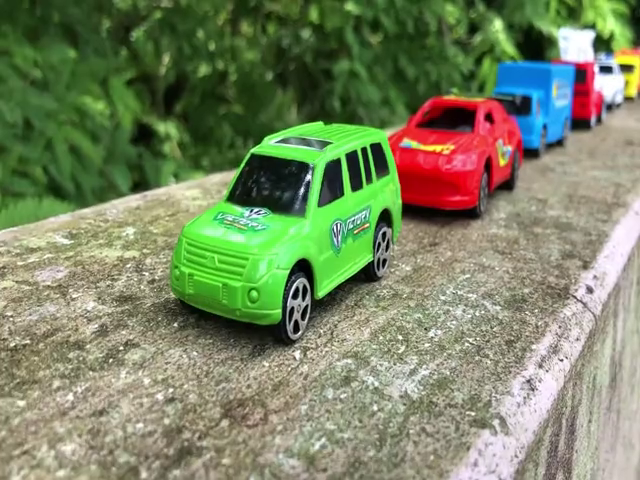

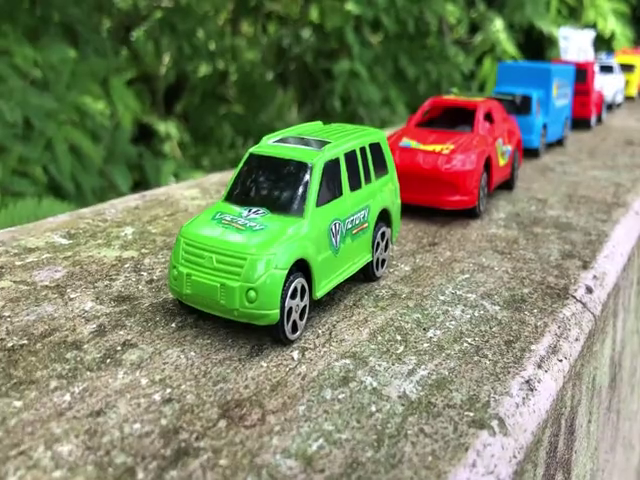

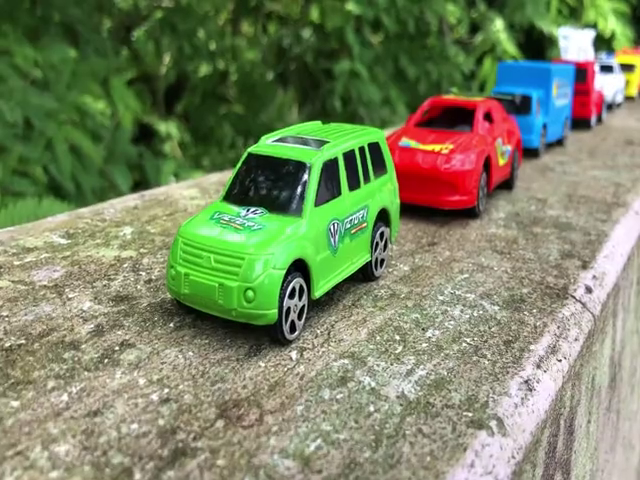

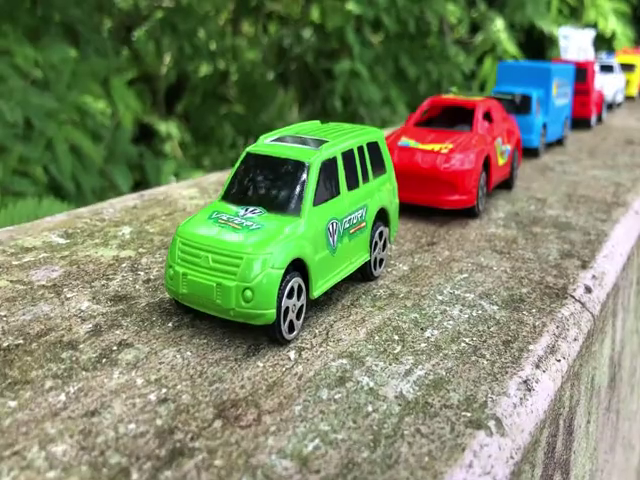

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Download sample video
!curl -o sample.mp4 https://github.com/RP-SDAAI/Computer-Vision/blob/1d0512ddb182876d220aa6b3bbbb113cba0c06ae/toycars.mp4

video_test = cv2.VideoCapture('sample.mp4')
while video.isOpened():
    ret, image = video.read()

    if not ret:
      break

    cv2_imshow(image) # Note cv2_imshow, not cv2.imshow

    cv2.waitKey(1) & 0xff

cv2.destroyAllWindows()
video.release()

In [ ]:
video_test = "sample.mp4"
!ffmpeg -y -loglevel info -i $video_out_file -vf scale=640:480 $video_test
show_local_mp4_video(video_test, width=640, height=480)

Creating the bounding box and initialize the tracker

In [ ]:
# Define an initial bounding box
bbox = (287, 23, 86, 320)

# Uncomment the line below to select a different bounding box
#bbox = cv2.selectROI(frame, False)

# Initialize tracker with first frame and bounding box
ok = tracker.init(frame, bbox)

Start the tracker and see the output

In [ ]:
while True:
    # Read a new frame
    ok, frame = video.read()
    if not ok:
        break
     
    # Start timer
    timer = cv2.getTickCount()
     # Update tracker
    ok, bbox = tracker.update(frame)
     # Calculate Frames per second (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);
     # Draw bounding box
    if ok:
        # Tracking success
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
    else :
        # Tracking failure
        cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)
     # Display tracker type on frame
    cv2.putText(frame, tracker_type + " Tracker", (100,20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50),2);
 
    # Display FPS on frame
    cv2.putText(frame, "FPS : " + str(int(fps)), (100,50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2);
    cv2.putText(frame, "FPS : " + str(int(fps)), (100,50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2);
    
    # Display result
    cv2_imshow(video)
    
    # Exit if ESC pressed
    if cv2.waitKey(1) & 0xFF == ord('q'): # if press SPACE bar
        break

video.release()
cv2.destroyAllWindows()



In [ ]:
video_mp4 = DataFolder + "/out3.mp4"
!ffmpeg -y -loglevel info -i $video_out_file -vf scale=640:480 $video_mp4

In [ ]:
show_local_mp4_video(video_mp4, width=640, height=480)

##Reference:  
- https://learnopencv.com/object-tracking-using-opencv-cpp-python/  
- https://livecodestream.dev/post/object-tracking-with-opencv/  
- https://github.com/spmallick/learnopencv/blob/master/tracking/tracker.py  